In [1]:
#GDP vs Birth Rate vs Global Hunger Index Data Exploration
#Skills used: Correlations, Scatterplots, Data Cleaning, Dataset Merging, Data Analysis
#Sources: 
#https://ourworldindata.org/grapher/gdp-per-capita-worldbank
#https://ourworldindata.org/grapher/gdp-per-capita-growth
#https://ourworldindata.org/grapher/crude-birth-rate
#https://ourworldindata.org/grapher/global-hunger-index

# Import necessary packages
import numpy as np

import pandas as pd
from pandas.plotting import table

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.min_rows = 999

#Readin CSV, and create a key column to for the datasets to be merged on

df1=pd.read_csv(r'C:\Users\justi\Downloads\gdp-per-capita-worldbank.csv')
df1['Year']= df1['Year'].astype(str)
df1['Key'] = df1[['Entity', 'Code', 'Year']].apply(lambda x: ''.join(x.dropna()), axis=1)

df2=pd.read_csv(r'C:\Users\justi\Downloads\gdp-per-capita-growth.csv')
df2['Year']= df2['Year'].astype(str)
df2['Key'] = df2[['Entity', 'Code', 'Year']].apply(lambda x: ''.join(x.dropna()), axis=1)

df3=pd.read_csv(r'C:\Users\justi\Downloads\crude-birth-rate.csv')
df3['Year']= df3['Year'].astype(str)
df3['Key'] = df3[['Entity', 'Code', 'Year']].apply(lambda x: ''.join(x.dropna()), axis=1)

df4=pd.read_csv(r'C:\Users\justi\Downloads\global-hunger-index.csv')
df4['Year']= df4['Year'].astype(str)
df4['Key'] = df4[['Entity', 'Code', 'Year']].apply(lambda x: ''.join(x.dropna()), axis=1)

#Merge datasets on the unique key created
df1=df1.merge(df2,how='outer', left_on='Key', right_on='Key')
df1=df1.merge(df3,how='outer', left_on='Key', right_on='Key')
df1=df1.merge(df4,how='outer', left_on='Key', right_on='Key')

#print data frame to ensure expected results
#print(df1)

C:\Users\justi\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x', 'Year_x', 'Entity_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [2]:
#Print columns names
print(df1.columns)

Index(['Entity_x', 'Code_x', 'Year_x',
       'GDP per capita, PPP (constant 2017 international $)', 'Key',
       'Entity_y', 'Code_y', 'Year_y', 'GDP per capita growth (annual %)',
       'Entity_x', 'Code_x', 'Year_x',
       'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Crude birth rate (births per 1,000 population)',
       'Entity_y', 'Code_y', 'Year_y', 'Global Hunger Index (IFPRI (2016))'],
      dtype='object')


In [3]:
#Rename columns to improve usability
df1.columns = ['Entity_1', 'Code_1', 'Year_1','GDP per capita', 'Key','Entity_2', 'Code_2', 'Year_2', 'GDP per capita growth %','Entity_3', 'Code_3', 'Year_3','Birth rate per 1000','Entity_4', 'Code_4', 'Year_4', 'Global Hunger Index']
print(df1.columns)


Index(['Entity_1', 'Code_1', 'Year_1', 'GDP per capita', 'Key', 'Entity_2',
       'Code_2', 'Year_2', 'GDP per capita growth %', 'Entity_3', 'Code_3',
       'Year_3', 'Birth rate per 1000', 'Entity_4', 'Code_4', 'Year_4',
       'Global Hunger Index'],
      dtype='object')


In [4]:
#Replace all NaN values with 'none' in all Entity, Code, and Year columns
df1[['Entity_1', 'Code_1', 'Year_1','Entity_2', 'Code_2', 'Year_2','Entity_3', 'Code_3', 'Year_3','Entity_4', 'Code_4', 'Year_4']] = df1[['Entity_1', 'Code_1', 'Year_1','Entity_2', 'Code_2', 'Year_2','Entity_3', 'Code_3', 'Year_3','Entity_4', 'Code_4', 'Year_4']].fillna('none')    

#Using a for loop, check for empty data in the 1st Entity coolumns, and fill in the missing data from subsequent columsn accordingly. 
#This is then done for the Code, and Year columns 
#The end result is a complete single Entity, Code, & Year column with no missing data 
for x in df1.index:
    if df1.loc[x,'Entity_1'] == 'none':
        if df1.loc[x,'Entity_2'] != 'none':
            df1.loc[x,'Entity_1'] = df1.loc[x,'Entity_2']
        elif df1.loc[x,'Entity_3'] != 'none':
            df1.loc[x,'Entity_1'] = df1.loc[x,'Entity_3']
        elif df1.loc[x,'Entity_4'] != 'none':
            df1.loc[x,'Entity_1'] = df1.loc[x,'Entity_4']
    
for x in df1.index:
    if df1.loc[x,'Code_1'] == 'none':
        if df1.loc[x,'Code_2'] != 'none':
            df1.loc[x,'Code_1'] = df1.loc[x,'Code_2']
        elif df1.loc[x,'Code_3'] != 'none':
            df1.loc[x,'Code_1'] = df1.loc[x,'Code_3']
        elif df1.loc[x,'Code_4'] != 'none':
            df1.loc[x,'Code_1'] = df1.loc[x,'Code_4']

for x in df1.index:
    if df1.loc[x,'Year_1'] == 'none':
        if df1.loc[x,'Year_2'] != 'none':
            df1.loc[x,'Year_1'] = df1.loc[x,'Year_2']
        elif df1.loc[x,'Year_3'] != 'none':
            df1.loc[x,'Year_1'] = df1.loc[x,'Year_3']
        elif df1.loc[x,'Year_4'] != 'none':
            df1.loc[x,'Year_1'] = df1.loc[x,'Year_4']

#Drop unneeded columns, and rename other columns 
df1 = df1.drop(columns=['Key','Entity_2', 'Code_2', 'Year_2','Entity_3','Code_3','Year_3','Entity_4','Code_4','Year_4'])
df1 = df1.rename(columns={'Entity_1': 'Entity', 'Code_1': 'Code','Year_1':'Year'})




In [5]:
#print data frame to ensure expected results
#print(df1)


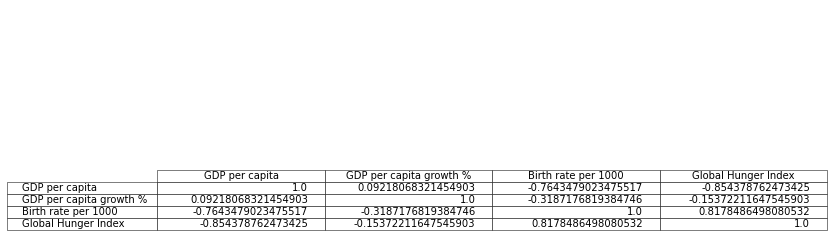

In [6]:
#Create a seperate copy 'df2' of the original dataframe 'df1'
df2=df1.copy(deep=True)

#df2 is then filtered to only show rows with complete data in GDP per capita, GDP per capita growthh %, Birth rate per 1000, and Global Hunger Index
#The Global Hunger Index is not reported in every country
#Rows with missing data in the Global Hunger Index IS NOT included 

df2 = df2[(df2['GDP per capita'].notnull()) & (df2['GDP per capita growth %'].notnull()) & (df2['Birth rate per 1000'].notnull()) & (df2['Global Hunger Index'].notnull())]

#Create a correlation analysis, and have the table exported as a png
df2.corr(method='spearman')

correlation_matrix = df2.corr(method='spearman')

fig, ax = plt.subplots(figsize=(12, 3)) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_frame_on(False) 

table1 = table(ax, data=correlation_matrix) 

plt.savefig(r'C:\Users\justi\Downloads\GDP correlation table1.png', bbox_inches='tight')



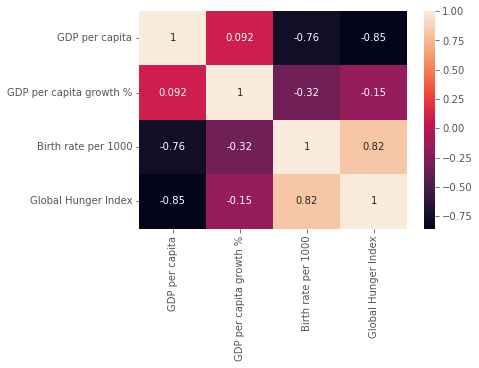

In [7]:
#Create a heatmap of the previous correlation analysis, and the heatmap exported as a png
sns.heatmap(correlation_matrix, annot=True)
plt.savefig(r'C:\Users\justi\Downloads\GDP Heatmap1.png', bbox_inches='tight')
plt.show()


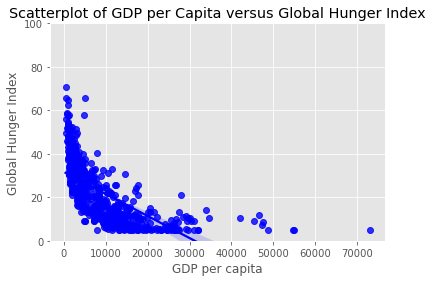

In [8]:
#Based on the above correlation numbers, we create a scatterplot of GDP per Capita versus Global Hunger Index
plt.ylim(0,100)
sns.regplot(x='GDP per capita',y='Global Hunger Index', data=df2, scatter_kws={"color":"blue"}, line_kws={"color":"blue"}).set(title='Scatterplot of GDP per Capita versus Global Hunger Index')
plt.savefig(r'C:\Users\justi\Downloads\GDP Scatterplot1.png', bbox_inches='tight')

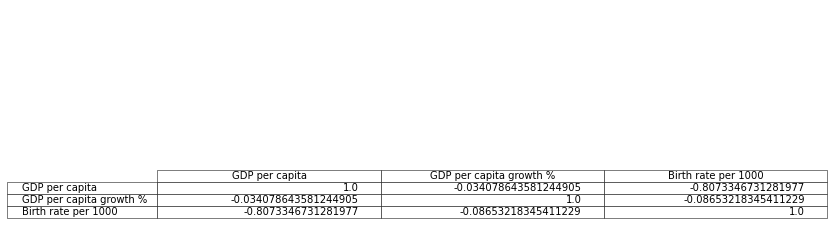

In [9]:
#Create a seperate copy 'df3' of the original dataframe 'df1'

df3=df1.copy(deep=True)

#df2 is then filtered to only show rows with complete data in GDP per capita, GDP per capita growthh %, Birth rate per 1000
#The Global Hunger Index is not reported in every country
#Rows with missing data in the Global Hunger Index IS included in 'df3'


df3 = df3[(df3['GDP per capita'].notnull()) & (df3['GDP per capita growth %'].notnull()) & (df3['Birth rate per 1000'].notnull())]
df3 = df3.drop(columns=['Global Hunger Index'])

#Create a correlation analysis, and have the table exported as a png
df3.corr(method='spearman')
correlation_matrix = df3.corr(method='spearman')

fig, ax = plt.subplots(figsize=(12, 3)) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_frame_on(False) 

table1 = table(ax, data=correlation_matrix) 

plt.savefig(r'C:\Users\justi\Downloads\GDP correlation table2.png', bbox_inches='tight')

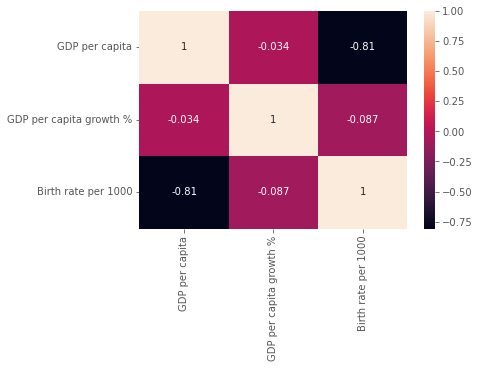

In [10]:
#Create a heatmap of the previous correlation analysis, and the heatmap exported as a png
sns.heatmap(correlation_matrix, annot=True)
plt.savefig(r'C:\Users\justi\Downloads\GDP Heatmap2.png', bbox_inches='tight')
plt.show()

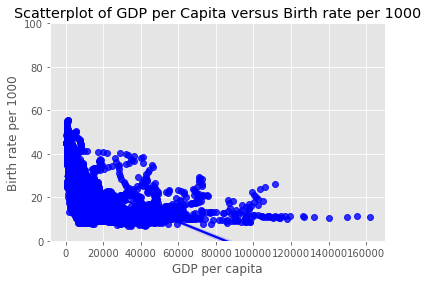

In [11]:
#Based on the above correlation numbers, we create a scatterplot of GDP per Capita versus Global Hunger Index
plt.ylim(0,100)
sns.regplot(x='GDP per capita',y='Birth rate per 1000', data=df3, scatter_kws={"color":"blue"}, line_kws={"color":"blue"}).set(title='Scatterplot of GDP per Capita versus Birth rate per 1000')
plt.savefig(r'C:\Users\justi\Downloads\GDP Scatterplot2.png', bbox_inches='tight')